In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%cd /content/drive/MyDrive/RPI/Intro to ML/PUBG_Placement_Prediction/
%ls

/content/drive/MyDrive/RPI/Intro to ML/PUBG_Placement_Prediction
 final_testing_data.csv                   test_V2.csv
 final_training_data.csv                  train_sample.csv
 Project_Report-1_HaolinXiong_PUBG.gdoc   train_V2.csv
'Pubg Game Prediction.txt'


# Loading Dataset

In [4]:
df = pd.read_csv('final_training_data.csv')

In [5]:
cor = df.corr()

In [6]:
#rankPoints are deprecated so dropped
df.drop('rankPoints',axis=1,inplace=True)

In [7]:
df.shape

(3334272, 29)

**Simple Linear Regression**

In [8]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'revives', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [9]:
abs(cor['winPlacePerc']).sort_values(ascending=False)

winPlacePerc       1.000000
walkDistance       0.810636
killPlace          0.718968
boosts             0.634322
weaponsAcquired    0.581914
damageDealt        0.439718
heals              0.427799
kills              0.419019
longestKill        0.409532
killStreaks        0.377322
rideDistance       0.343153
assists            0.298705
DBNOs              0.279267
headshotKills      0.277717
revives            0.240311
swimDistance       0.149434
vehicleDestroys    0.073312
numGroups          0.039583
maxPlace           0.037451
roadKills          0.034842
teamKills          0.015818
killPoints         0.013309
rankPoints         0.013111
winPoints          0.007471
matchDuration      0.005017
Unnamed: 0         0.000159
Name: winPlacePerc, dtype: float64

In [10]:
corr_list = list(abs(cor['winPlacePerc'].drop('winPlacePerc',axis=0)).sort_values(ascending=False).keys())

In [11]:
corr_list

['walkDistance',
 'killPlace',
 'boosts',
 'weaponsAcquired',
 'damageDealt',
 'heals',
 'kills',
 'longestKill',
 'killStreaks',
 'rideDistance',
 'assists',
 'DBNOs',
 'headshotKills',
 'revives',
 'swimDistance',
 'vehicleDestroys',
 'numGroups',
 'maxPlace',
 'roadKills',
 'teamKills',
 'killPoints',
 'rankPoints',
 'winPoints',
 'matchDuration',
 'Unnamed: 0']

In [12]:
df['winPlacePerc'] = df['winPlacePerc'].fillna(0)

In [13]:
df.shape

(3334272, 29)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# **Deal With Cheaters**

All teams with at least one player with >20 kills are removed

3334272 original

3333169 players left

In [15]:
df['kills'].describe()

count    3.334272e+06
mean     9.252910e-01
std      1.562194e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.200000e+01
Name: kills, dtype: float64

In [16]:
true_df = df.copy()

In [17]:
cheater_team = df.loc[df['kills']>20]

In [18]:
cheater_team

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1907,1907,7711e1d39407da,a9fbc63469296f,45fc89f9b11eaf,1,4,2325.0,13,8,2,1,1142,21,2,192.10,1376,duo-fpp,49,46,1,2012.0,0,0.0,0,0,2697.0,5,1505,1.0000
28177,28177,44513e16340a63,c1e3f56e09b9a4,cf5dd782577ea9,1,2,2767.0,24,17,1,1,1355,22,3,670.90,1877,squad,27,26,0,2589.0,0,0.0,0,0,3290.0,7,1509,0.9615
30094,30094,8d8d78ba4e9b55,6634da8e3940de,8a728def0644be,3,0,1988.0,22,6,5,5,1000,22,3,103.10,1198,normal-squad-fpp,14,14,1,1668.0,0,0.0,0,0,1864.0,33,1500,1.0000
40129,40129,f7a740ffbc2c43,418f6120b2e193,f2614050e9046a,2,0,1906.0,0,4,19,2,0,22,3,124.00,998,normal-duo-fpp,7,7,0,0.0,0,0.0,0,0,116.7,16,0,1.0000
43197,43197,367599b150318a,0370e2f3be345b,5f2f9fcb9705af,6,0,2459.0,0,3,0,2,0,23,3,100.00,910,normal-duo-fpp,7,6,0,0.0,0,0.0,0,0,208.5,12,0,0.8333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292152,3292152,310cdfbe701f03,02b0ccfda16b93,f755207f23cf88,2,4,2645.0,16,8,0,1,0,24,5,436.70,1319,squad,27,27,0,0.0,0,0.0,0,0,3180.0,7,0,1.0000
3298784,3298784,8800992f7dd530,87e52e1a6b0a73,1e573980b3ee3c,1,0,1999.0,0,1,8,5,1000,26,3,33.05,1559,normal-squad-fpp,7,7,0,0.0,0,0.0,0,0,111.8,59,1500,0.3333
3301038,3301038,f69c34cce4d46a,ea800ea1aa6efa,ed092b499ac27d,3,0,2817.0,0,6,2,3,1000,28,4,81.38,1059,normal-squad-fpp,6,6,0,0.0,0,0.0,0,0,1147.0,31,1500,0.4000
3314427,3314427,0a2721fcf1cdd9,1708576031cf96,fcd20a43cb81ea,6,0,3297.0,0,5,4,1,0,30,5,203.40,896,normal-solo-fpp,20,13,0,0.0,0,0.0,0,0,253.0,32,0,1.0000


In [19]:
#drop the cheaters' team
cheater_team_id = list(cheater_team['groupId'])
true_df['cheater'] = df['groupId'].apply(lambda x: x in cheater_team_id)
true_df.drop(true_df.loc[true_df['cheater']].index,inplace=True)
true_df.reset_index(inplace=True)

In [ ]:
len(df)

3334272

In [ ]:
len(true_df)

3333169

In [20]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'revives', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [21]:
corr_list

['walkDistance',
 'killPlace',
 'boosts',
 'weaponsAcquired',
 'damageDealt',
 'heals',
 'kills',
 'longestKill',
 'killStreaks',
 'rideDistance',
 'assists',
 'DBNOs',
 'headshotKills',
 'revives',
 'swimDistance',
 'vehicleDestroys',
 'numGroups',
 'maxPlace',
 'roadKills',
 'teamKills',
 'killPoints',
 'rankPoints',
 'winPoints',
 'matchDuration',
 'Unnamed: 0']

# Add some new features

In [22]:
groups = true_df.groupby('groupId').sum()
groups.reset_index(inplace=True)
add_col=groups.loc[:,['groupId','kills','revives','weaponsAcquired','teamKills']]
add_col=add_col.rename(columns={'kills':'groupKills','revives':'groupRevives',
                                'weaponsAcquired':'groupWeapons','teamKills':'groupOwnKills'})
true_df=true_df.merge(add_col,how='left',on=['groupId'])

In [25]:
true_df.head()

,index,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,cheater,groupKills,groupRevives,groupWeapons,groupOwnKills
0,0,0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444,False,4,0,5,0
1,1,1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400,False,4,0,24,0
2,2,2,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,0,1,1,18.44,1395,squad-fpp,28,28,0,0.0000,0,0.00,0,0,34.7,1,0,0.0370,False,4,0,10,0
3,3,3,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,1262,0,0,0.00,1316,squad-fpp,28,28,0,0.0000,0,0.00,0,0,13.5,1,1497,0.0000,False,2,0,6,0
4,4,4,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.00,1967,solo-fpp,96,92,0,2004.0000,0,0.00,0,0,1089.0,6,1500,0.7368,False,0,0,6,0


In [26]:
cor = true_df.corr()

In [28]:
corr_list = list(abs(cor['winPlacePerc'].drop('winPlacePerc',axis=0)).sort_values(ascending=False).keys())

In [29]:
corr_list

['walkDistance',
 'killPlace',
 'boosts',
 'weaponsAcquired',
 'damageDealt',
 'heals',
 'kills',
 'groupKills',
 'longestKill',
 'killStreaks',
 'rideDistance',
 'groupRevives',
 'assists',
 'groupWeapons',
 'DBNOs',
 'headshotKills',
 'revives',
 'swimDistance',
 'vehicleDestroys',
 'numGroups',
 'maxPlace',
 'roadKills',
 'groupOwnKills',
 'teamKills',
 'killPoints',
 'winPoints',
 'matchDuration',
 'Unnamed: 0',
 'index',
 'cheater']

In [46]:
true_df.loc[true_df['matchType']=='normal-squad-fpp']

,index,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,cheater,groupKills,groupRevives,groupWeapons,groupOwnKills
194,194,194,7bd9e1b45cd3d8,9e132c0869c965,ae4771bde3e2ec,0,3,335.90,1,0,4,16,0,1,1,5.65,1950,normal-squad-fpp,16,16,0,3899.0,0,0.0,0,0,3187.00,5,0,0.8000,False,4,1,24,0
1056,1056,1056,fff91132929a87,87a2de34e6a88a,2da28eebf601db,2,0,245.20,0,0,10,45,0,2,1,19.80,697,normal-squad-fpp,13,12,0,0.0,0,0.0,0,0,16.72,15,0,0.4167,False,49,0,138,0
1231,1231,1231,939017b986b77e,9a59e507a409cb,f1566f68443ed0,2,6,89.14,0,0,7,32,0,0,0,0.00,1952,normal-squad-fpp,16,16,1,4194.0,0,0.0,0,0,2563.00,12,0,0.9333,False,3,4,25,0
1313,1313,1313,2e78aa75f1af45,623961dddbfba8,fc982674d9d00e,4,4,565.30,3,1,3,3,1000,4,1,297.80,2006,normal-squad-fpp,16,16,1,6433.0,0,0.0,0,0,2843.00,6,1500,1.0000,False,15,4,21,0
1363,1363,1363,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.00,0,0,3,18,0,6,3,23.54,593,normal-squad-fpp,15,13,0,0.0,0,0.0,0,0,0.00,8,0,0.8571,False,33,0,82,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331463,3332566,3332566,5e5d5a9b2ba80c,43ee739457dc89,45333b04f731c8,0,4,187.90,0,0,1,34,0,0,0,0.00,1873,normal-squad-fpp,13,13,0,4782.0,0,0.0,0,0,1943.00,7,0,0.6667,False,2,3,21,0
3331801,3332904,3332904,ec45d41eca9f8b,bebd0c8045d534,62fc8ace946647,0,2,171.40,1,0,11,20,0,1,1,17.14,1967,normal-squad-fpp,15,15,0,7766.0,0,0.0,0,0,1595.00,7,0,0.5000,False,4,1,23,1
3331903,3333006,3333006,2b1af122aaa1e1,d65b1491b47554,05ce38426d7961,4,0,505.40,6,1,0,30,0,3,1,158.00,1199,normal-squad-fpp,5,5,0,2324.0,0,0.0,0,0,1626.00,17,0,0.7500,False,54,8,123,0
3332714,3333817,3333817,455b0ab51addcf,1e83e7cc091df5,8fac94db3260a0,1,4,1300.00,0,5,5,2,0,16,3,109.90,833,normal-squad-fpp,8,8,0,0.0,0,0.0,0,0,186.30,13,0,1.0000,False,72,0,98,1


In [ ]:
normal-squad-fpp

In [ ]:
true_df.loc[true_df['groupKills']==100]

In [33]:
true_df['groupId']

0          4d4b580de459be
1          684d5656442f9e
2          289a6836a88d27
3          2c485a1ad3d0f1
4          eaba5fcb7fc1ae
                ...      
3333164    ac3f1b4a56e5ad
3333165    d238e426f50de7
3333166    408cdb5c46b2ac
3333167    c2223f35411394
3333168    8c74f72fedf5ff
Name: groupId, Length: 3333169, dtype: object

In [32]:
true_df['groupKills'].describe()

count    3.333169e+06
mean     2.600985e+00
std      3.573398e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      1.990000e+02
Name: groupKills, dtype: float64

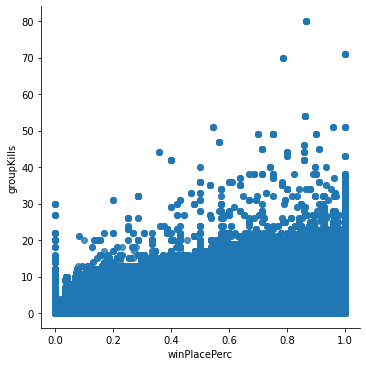

In [47]:
sns.lmplot(x='winPlacePerc',y='groupKills',data=true_df.loc[true_df['matchType']!='normal-squad-fpp'],fit_reg=False)
plt.show()

# Implement Random Forest, XGBoost, KNN, SVM, Neural Net

Train Test Split


In [49]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold

In [50]:
target_label = ['winPlacePerc']
feature_label = corr_list[0:9]
X_train = pd.DataFrame(true_df,columns= feature_label)
y_train = pd.DataFrame(true_df,columns= target_label)

In [51]:
X_train.shape, y_train.shape

((3333169, 9), (3333169, 1))

In [52]:
df_test = pd.read_csv('final_testing_data.csv')
df_test['winPlacePerc'] = df_test['winPlacePerc'].fillna(0)

In [53]:
groups = df_test.groupby('groupId').sum()
groups.reset_index(inplace=True)
add_col=groups.loc[:,['groupId','kills','revives','weaponsAcquired','teamKills']]
add_col=add_col.rename(columns={'kills':'groupKills','revives':'groupRevives',
                                'weaponsAcquired':'groupWeapons','teamKills':'groupOwnKills'})
df_test=df_test.merge(add_col,how='left',on=['groupId'])

In [55]:
X_test = pd.DataFrame(df_test,columns= feature_label)
y_test = pd.DataFrame(df_test,columns= target_label)

In [56]:
X_test.shape, y_test.shape

((1112694, 9), (1112694, 1))

In [59]:
cheater_team_test = df_test.loc[df_test['kills']>20]
cheater_team_id_test = list(cheater_team_test['groupId'])
df_test['cheater'] = df_test['groupId'].apply(lambda x: x in cheater_team_id_test)
cheater_index = np.array((df_test.loc[df_test['cheater']]).index)

PRO Team

In [57]:
pro_team_test = df_test.loc[df_test['groupKills']>30]
pro_team_id_test = list(pro_team_test['groupId'])
df_test['pro'] = df_test['groupId'].apply(lambda x: x in pro_team_id_test)
pro_index = np.array((df_test.loc[df_test['pro']]).index)

In [60]:
cheater_index = np.append(cheater_index,pro_index)

Random Forest Regressor

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [67]:
def my_Random_Forest(X_train, X_test, y_train, y_test):
  from sklearn.ensemble import RandomForestRegressor
  forest = RandomForestRegressor(n_estimators = 100, max_depth=5, random_state = 0)
  forest.fit(X_train, y_train)
  y_pred = forest.predict(X_test)
  print('Random Forest MAE:', mean_absolute_error(y_test, y_pred))
  forest_importance = forest.feature_importances_
  for i in range(len(forest_importance)):
    print(feature_label[i],':',forest_importance[i])

In [68]:
my_Random_Forest(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest MAE: 0.0873309224339339
walkDistance : 0.8102294438346679
killPlace : 0.17753532391043786
boosts : 0.003448726282652196
weaponsAcquired : 0.0
damageDealt : 0.0
heals : 0.0
kills : 0.008265271504681447
groupKills : 0.0005212344675604318
longestKill : 0.0


XGBoost Regression

In [69]:
def my_xgb(X_train, X_test, y_train, y_test):
  import xgboost as xg
  from sklearn.model_selection import KFold
  from sklearn.model_selection import cross_val_score
  param = {"booster":"gblinear", "objective":"reg:squarederror"}
  xgb_reg = xg.XGBRegressor(params = param,n_estimators = 100,max_depth=5)
  xgb_reg.fit(X_train,y_train)
  y_pred = xgb_reg.predict(X_test)
  print('XGBoost MAE:', mean_absolute_error(y_test, y_pred))
  xgb_importance = xgb_reg.feature_importances_
  for i in range(len(xgb_importance)):
    print(feature_label[i],':',xgb_importance[i])

In [70]:
my_xgb(X_train, X_test, y_train, y_test)

[06:56:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost MAE: 0.07258154089982188
walkDistance : 0.76637334
killPlace : 0.12180491
boosts : 0.048144814
weaponsAcquired : 0.005143313
damageDealt : 0.0004740625
heals : 0.0028722745
kills : 0.036951225
groupKills : 0.012950981
longestKill : 0.005285052


KNN Regressor with 5-fold cross validation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def KNN_CV(X_train, y_train):
  knn_benchmark = list()
  for i in range(11,41,2):
    knn_reg = KNeighborsRegressor(n_neighbors = i)
    scores = cross_val_score(knn_reg,X_train,y_train,cv = 5,scoring='neg_mean_absolute_error')
    knn_benchmark.append(scores.mean())
  #from plot, k = 19 is the best
  plt.plot(range(11,41,2),knn_benchmark)
  plt.xlabel('K')
  plt.ylabel('MAE')
  print('k = 19, MAE=',knn_benchmark[4]*-1)

In [ ]:
# KNN_CV(X_train, y_train)

In [ ]:
def my_KNN(X_train, X_test, y_train, y_test):
  from sklearn.preprocessing import StandardScaler
  standardized_X_train = StandardScaler().fit_transform(X_train)
  knn_reg = KNeighborsRegressor(n_neighbors = 19)
  knn_reg.fit(standardized_X_train, y_train)
  standardized_X_test = StandardScaler().fit_transform(X_test)
  y_pred = knn_reg.predict(standardized_X_test)
  y_pred[cheater_index] = 1.0
  print('KNN MAE:', mean_absolute_error(y_test, y_pred))

In [ ]:
my_KNN(X_train, X_test, y_train, y_test)

KNN MAE: 0.07760437645740403


SVM Regression (SVR) failed since it takes too much time

In [ ]:
def my_SVM(X_train, X_test, y_train, y_test):
  from sklearn.preprocessing import StandardScaler
  from sklearn.svm import SVR
  standardized_X_train = StandardScaler().fit_transform(X_train)
  standardized_X_test = StandardScaler().fit_transform(X_test)
  svr_reg = SVR(kernel = 'rbf')
  svr_reg.fit(standardized_X_train, y_train)
  y_pred = svr_reg.predict(standardized_X_test)
  y_pred[cheater_index] = 1.0
  print('SVR MAE:', mean_absolute_error(y_test, y_pred))

In [ ]:
# my_SVM(X_train, X_test, y_train, y_test)

Neutral Network

In [ ]:
X_train.shape

(3333169, 9)

In [71]:
def my_neutral_network(X_train, X_test, y_train, y_test):
  import tensorflow as tf
  from keras.models import Sequential
  from keras.layers import Dense
  from sklearn.preprocessing import StandardScaler
  standardized_X_train = StandardScaler().fit_transform(X_train)
  standardized_X_test = StandardScaler().fit_transform(X_test)
  my_neutral_net = Sequential()

  my_neutral_net.add(Dense(8, activation='relu', input_shape=(9,)))
  my_neutral_net.add(Dense(8, activation='relu'))
  my_neutral_net.add(Dense(1, activation='sigmoid'))

  my_neutral_net.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['mean_absolute_error'])
  my_neutral_net.fit(standardized_X_train, y_train,epochs=10, batch_size=64)
  y_pred = my_neutral_net.predict(standardized_X_test)
  print('Neural Net MAE:', mean_absolute_error(y_test, y_pred))

In [72]:
my_neutral_network(X_train, X_test, y_train, y_test)

Epoch 1/10
52081/52081 [==============================] - 69s 1ms/step - loss: 0.5069 - mean_absolute_error: 0.0842
Epoch 2/10
52081/52081 [==============================] - 70s 1ms/step - loss: 0.4977 - mean_absolute_error: 0.0736
Epoch 3/10
52081/52081 [==============================] - 69s 1ms/step - loss: 0.4976 - mean_absolute_error: 0.0733
Epoch 4/10
52081/52081 [==============================] - 69s 1ms/step - loss: 0.4975 - mean_absolute_error: 0.0732
Epoch 5/10
52081/52081 [==============================] - 70s 1ms/step - loss: 0.4975 - mean_absolute_error: 0.0732
Epoch 6/10
52081/52081 [==============================] - 71s 1ms/step - loss: 0.4972 - mean_absolute_error: 0.0731
Epoch 7/10
52081/52081 [==============================] - 72s 1ms/step - loss: 0.4972 - mean_absolute_error: 0.0730
Epoch 8/10
52081/52081 [==============================] - 71s 1ms/step - loss: 0.4973 - mean_absolute_error: 0.0730
Epoch 9/10
52081/52081 [==============================] - 71s 1ms/step -